# Part I - Ford Go-Bike
## by Ajibola Oyedeji
<a id='top'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univa">Univariate Exploration</a></li>
<li><a href="#biva">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> The dataset contains 183,411 bike rides with 16 variables on ride including ride duration, start and end latitude and longitude, user type, age and gender. Get the [dataset here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv).

> This notebook explores and documents the exploratory process of the Ford Go-Bike data.

<a href="#top">Back to Top</a>

<a id='wrangling'></a>
## Preliminary Wrangling

<a href="#top">Back to Top</a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import time

import mpu  # package to calculate distance

%matplotlib inline

In [2]:
# Default plot settings
base_color = sns.color_palette()[0]

> Load dataset and describe its properties through the questions below.


In [3]:
# Load data
bike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [4]:
# Define function to convert columns to category
def to_category(df, cols):
    """Convert selected columns to 'category'. Takes dataframe name and list of columns as inputs"""
    for col in cols:
        df[col] = df[col].astype('category')

# Convert the columns to category
cate = ['start_station_id', 'end_station_id', 'user_type', 'member_gender', 'bike_share_for_all_trip']
to_category(bike, cate)

# Convert bike_id to string
bike['bike_id'] = bike.bike_id.astype(str)

In [5]:
# Check for duplicates
sum(bike.duplicated())

0

In [6]:
# Calcutate distance of ride in Kilometers
bike['distance_km'] = bike.apply(lambda x: mpu.haversine_distance((x.start_station_latitude, x.start_station_longitude),
                                                               (x.end_station_latitude, x.end_station_longitude)), axis=1)

# Calculate the users age in 2019
bike['age_years'] = 2019 - bike.member_birth_year

# Create age groups
bin = [15, 25, 46, 65, 200]
label = ["Adolescent", "Middle-aged Adult", "Old-aged Adult", "Seniors"]
bike["age_group"] = pd.cut(bike["age_years"], bins=bin, labels=label, right=False)

In [7]:
bike['age_years'].min()

18.0

The minimum age of user is 18 years which means there are no children riders in the dataset.

In [8]:
# Convert time to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

# Get categorical variables from Start time
bike['start_day'] = bike.start_time.dt.date
bike['day'] = bike.start_time.dt.day_name().astype('category')
bike['time_day'] = bike.start_time.dt.hour
bin = [5, 12, 17, 21, 24]
label = ["Morning", "Afternoon", "Evening", "Night"]
bike["time"] = pd.cut(bike["time_day"], bins=bin, labels=label, right=False).astype(str)
bins = [0, 5]
labels = ["Night"]
bike["times"] = pd.cut(bike["time_day"], bins=bins, labels=labels, right=False).astype(str)
bike['day_time'] = (bike.time + bike.times).str.replace('nan', "").astype('category')

bike.drop(columns=['time', 'times', 'time_day'], inplace=True)

In [9]:
bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,age_years,age_group,start_day,day,day_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,0.544709,35.0,Middle-aged Adult,2019-02-28,Thursday,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,1.742999,NaN,NaN,2019-02-28,Thursday,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2.704545,47.0,Old-aged Adult,2019-02-28,Thursday,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,0.260739,30.0,Middle-aged Adult,2019-02-28,Thursday,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2.409301,45.0,Middle-aged Adult,2019-02-28,Thursday,Night


In [10]:
bike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,distance_km,age_years
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,1.690659,34.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,1.097589,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,0.000000,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,0.910955,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,1.430738,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,2.225687,39.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,69.469241,141.000000


In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  category      
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  category      
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [12]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

### What is the structure of your dataset?

> There are 183,412 distinct Go-ride listings with 20 features contained in the dataset. There are 9 numerical features but 2 (start_station_id, end_station_id) are categorical. There are 4 features with the latitude and longitudes of the start and end stations. The distance of the ride has been calculated. Also, the time of day and day of the week have been generated from the data.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in finding out features that help determine when most trips take place in terms of time of day, day of the week. 
> The average duration of trips taken? 
> Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would expect that the time of the day and day of the week will be a huge factor on when most trips would take place. It is expected that there will be more trips during holidays and more generally during the weekends compared to weekdays. In addition, age of users will likely influence the ride and lenght or distance covered. 

<a id='univa'></a>
## Univariate Exploration

> In this section, I will begin by exploring the distribution important variables strating with the duration in seconds.

<a href="#top">Back to Top</a>

The duration of rides in seconds is right-skewed and has a long tail with very few high values on the right hand side of the  
histogram. These high values will be verified by calculating the time difference between the start_time and end_time then  
comparing to the 'duration_sec' column. 


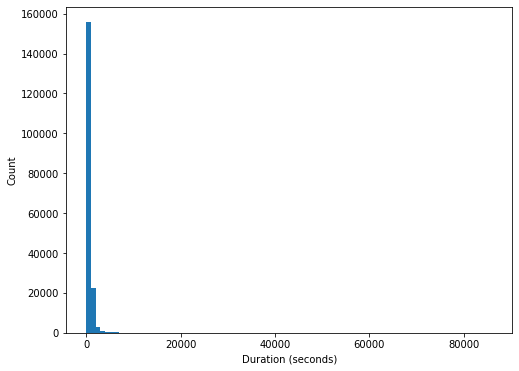

In [13]:
sol_string = ["The duration of rides in seconds is right-skewed and has a long tail with very few high values on the right hand side of the ",
              "histogram. These high values will be verified by calculating the time difference between the start_time and end_time then ",
              "comparing to the 'duration_sec' column. "]
print((" \n").join(sol_string))

fig, ax = plt.subplots(figsize=(8, 6))
bin_size = 1000
bin = np.arange(0, bike['duration_sec'].max()+bin_size, bin_size)
plt.hist(data=bike, x='duration_sec', bins= bin)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count');

In [14]:
time_diff = (bike.end_time - bike.start_time).astype('timedelta64[s]').astype(int)
if sum(bike['duration_sec'] != time_diff) == 0:
    if sum(bike['duration_sec'] == time_diff) == 0:
        raise ValueError("Duration in seconds not equal to calculated time difference")
    try:
        print("Validated: Duration in seconds is equal to calculated time difference.") 
    except:
        print("Error")

Validated: Duration in seconds is equal to calculated time difference.


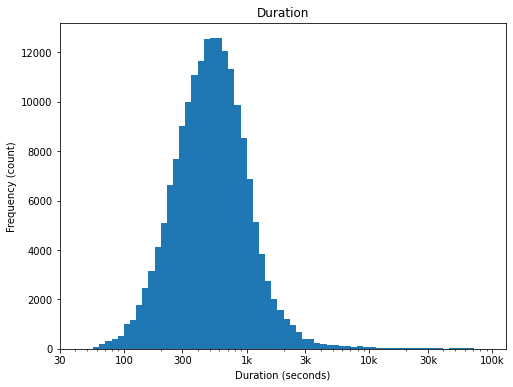

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
bin_size = 0.05
bin= 10 ** np.arange(1.7, np.log10(bike['duration_sec'].max())+bin_size, bin_size)
plt.hist(data=bike, x='duration_sec', bins=bin)
plt.xscale('log')
plt.xticks([3e1, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5], [ '30', '100', '300', '1k', '3k', '10k', '30k', '100k'])
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency (count)')
plt.title('Duration');

The histogram of the trip duration was transformed using a log scale. The plot shows a unimodal normal distribution with its peak value around 500 to 800 seconds per ride with a frequency of more than 12,000. The duration distribution still shows a right skew.

Next, we will study the distribution of the distances covered.

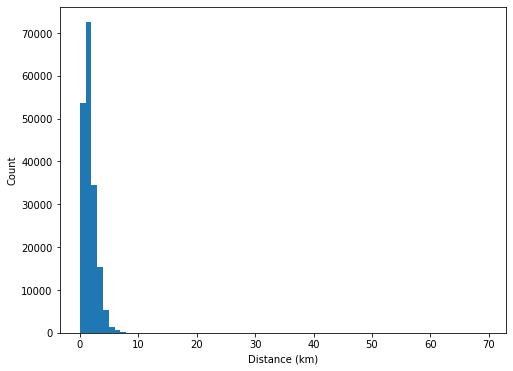

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(data=bike, x='distance_km', bins= 70)
plt.xlabel('Distance (km)')
plt.ylabel('Count');

In [17]:
#Checking for outliers and dropping
print(bike[bike.distance_km > 20])
bike = bike[bike.distance_km <= 20]

        duration_sec              start_time                end_time  \
112038          6945 2019-02-12 14:28:44.402 2019-02-12 16:24:30.158   

       start_station_id                                start_station_name  \
112038             21.0  Montgomery St BART Station (Market St at 2nd St)   

        start_station_latitude  start_station_longitude end_station_id  \
112038               37.789625              -122.400811          300.0   

            end_station_name  end_station_latitude  ...   user_type  \
112038  Palm St at Willow St             37.317298  ...  Subscriber   

       member_birth_year member_gender  bike_share_for_all_trip distance_km  \
112038            1985.0        Female                       No   69.469241   

       age_years          age_group   start_day      day   day_time  
112038      34.0  Middle-aged Adult  2019-02-12  Tuesday  Afternoon  

[1 rows x 22 columns]


The distance distribution has an outlier of 69.5km which only took about 11mins to complete the trip. Going that distance is impossible, and such this would be dropped.

The distribution will be plotted with new values.

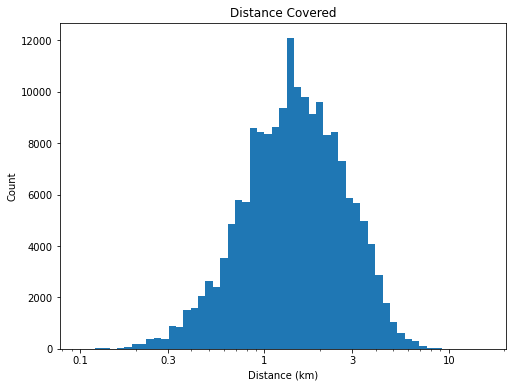

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
bin_size = 0.04
bin= 10 ** np.arange(-1, np.log10(bike['distance_km'].max())+bin_size, bin_size)
plt.hist(data=bike, x='distance_km', bins=bin)
plt.xscale('log')
#plt.yscale('log')
plt.xticks([0.1, 0.3, 1, 3, 1e1], ['0.1', '0.3', '1', '3', '10'])
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.title('Distance Covered');

The distance covered in kilometers during the bike trip has a long_tail, right skew distribution. When plotted on a log scale, the distance distribution is a roughly unimodal distribution and looks a little like a normal distribution with its peak value around 1.0-2.0km.

It is noteworthy to check for a correlation or relationship between distance covered and duration taken as it is expected that the farther the trip is, the longer the trip should be.

Next, the distribution of the users' ages will be examined.

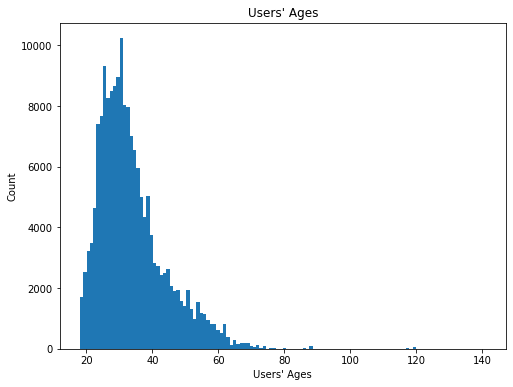

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(data=bike, x='age_years', color=base_color, bins=122)
plt.xlabel("Users' Ages")
plt.ylabel('Count')
plt.title("Users' Ages");

The age distribution is a long-tailed distribution and right-skewed. From the plot, the minimum age is 18 while there are some outliers with high value from 80 years to 141 years. These high values will be checked if they are errors and can be corrected or just dropped.

In [20]:
# Rows with ages above 90 years are dropped
print(bike[bike['age_years'] > 90].shape)
bike = bike[bike['age_years'] <= 90]

(77, 22)


There are 77 riders with ages above 90 years old. These values are dropped from the dataset and the the age distribution redrawn.

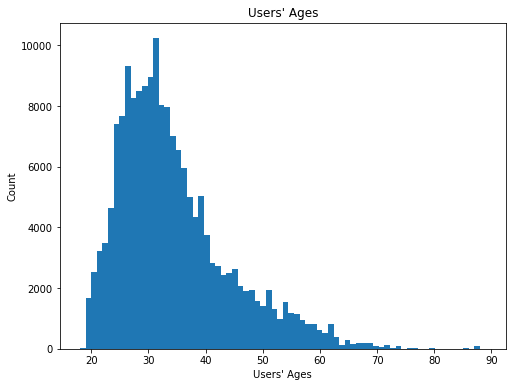

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(data=bike, x='age_years', color=base_color, bins=72)
plt.xlabel("Users' Ages")
plt.ylabel('Count')
plt.title("Users' Ages");

In the case of users' ages, the distribution is roughly bimodal having peaks between 28 and 32. Majority of riders are young adults which is expected as this is an energy consuming act. It would be preferable to check the age group distribution to support this claim.

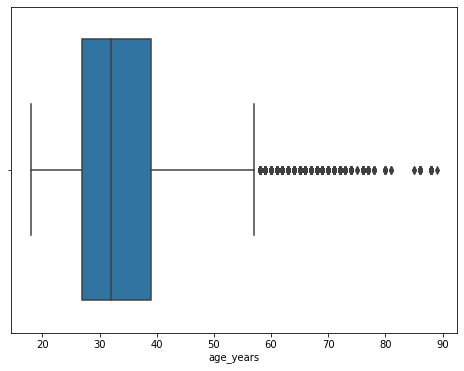

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=bike, x='age_years');

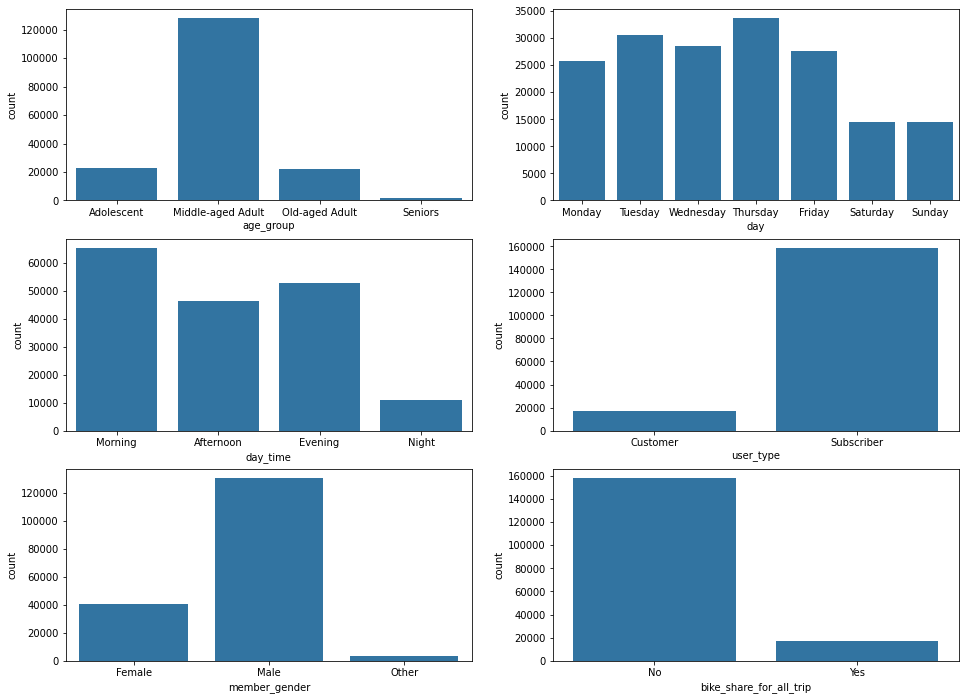

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = [16,12])
sns.countplot(data=bike, x='age_group', color=base_color, ax=ax[0,0])
sns.countplot(data=bike, x='day', order=day_order, color=base_color, ax=ax[0, 1])
sns.countplot(data=bike, x='day_time', order= time_order, color=base_color, ax=ax[1, 0])
sns.countplot(data=bike, x='user_type', color=base_color, ax=ax[1,1])
sns.countplot(data=bike, x='member_gender', color=base_color, ax=ax[2,0])
sns.countplot(data=bike, x='bike_share_for_all_trip', color=base_color, ax=ax[2,1]);

The classification of the different age group is given:<br>
Child: 0 - 14 years <br>
Adolescent: 15 - 24 years <br>
Middle-aged Adult: 25 - 44 years <br>
Old-aged Adult: 46 - 64 years <br>
Seniors: 65 years and above <br>

For the age group distribution, the majority of bikers are middle-aged with over 120,000 riders with both adolescents and old-aged adults following in a distant with about 20,000 riders respectively. This is to be expected as the middle-aged adult tend to be more adventurous. There are no children riders with very few seniors represented.

Interestingly, as against expectations, saturdays and sundays which are weekend days have the least rides originating during the period. Most rides occured on thursdays followed by tuesdays with both having avove 30,000 rides.

Expectedly, most rides occurred in the morning and evenings when the weather is expected to be cooler and conducive for relaxation and riding. Night has the least record of rides.

The other plots show that most riders are male with males accounting for over 120,000 rides more than thrice the value for females, while most rides were from solo rides from paying subscribers.

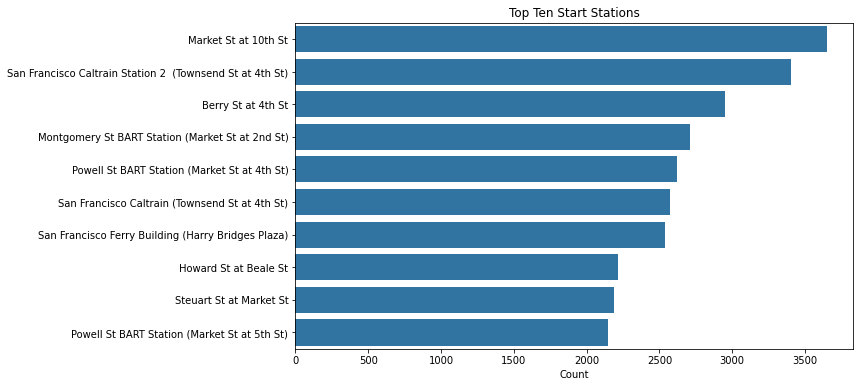

In [24]:
fav_start = bike.start_station_name.value_counts().head(10)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y=fav_start.index, x= fav_start, data=bike, color=base_color, orient='h')
plt.xlabel('Count')
plt.title('Top Ten Start Stations');

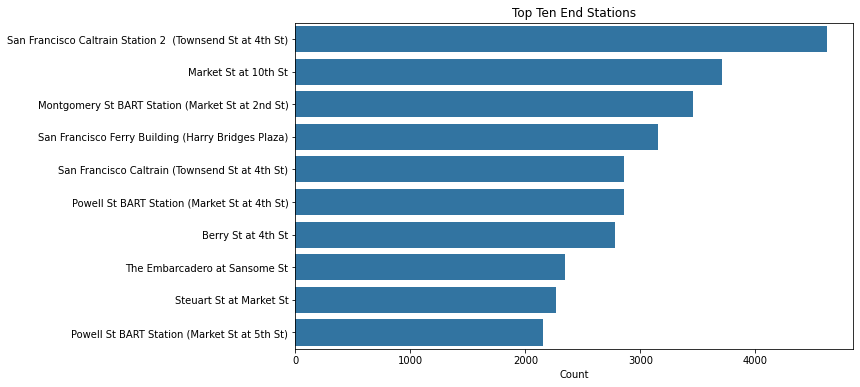

In [25]:
fav_end = bike.end_station_name.value_counts().head(10)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y=fav_end.index, x= fav_end, data=bike, color=base_color, orient='h')
plt.xlabel('Count')
plt.title('Top Ten End Stations');

The top two stations for origin and destination are Market St and San Francisco Caltrain Station 2. The complete distribution cannot be captured properly as ther over 320 different stations covered.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of rides in seconds took on a wide range of values and was subsequently transformed using a log scale. Upon transformation, the duration was unimodal with its peak value around 500-800 seconds and having a normal distribution.

> Surprisingly, weekends have the least rides originating during the period as against expectation. Most rides occurred on thursdays followed by tuesdays with both having avove 30,000 rides.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the ages of the riders, outliers were identified with 77 riders over 90 years old. Likewise, in the calculated distance, an outlier of 69km ride in about 11 minutes was dropped. These values were removed.

<a id='biva'></a>
## Bivariate Exploration

> This section will begin by looking at the pairwise relationship between features.

<a href="#top">Back to Top</a>

In [26]:
numerical_vars = ['duration_sec', 'age_years', 'distance_km', 'start_station_latitude', 'end_station_latitude', 'start_station_longitude', 'end_station_longitude']

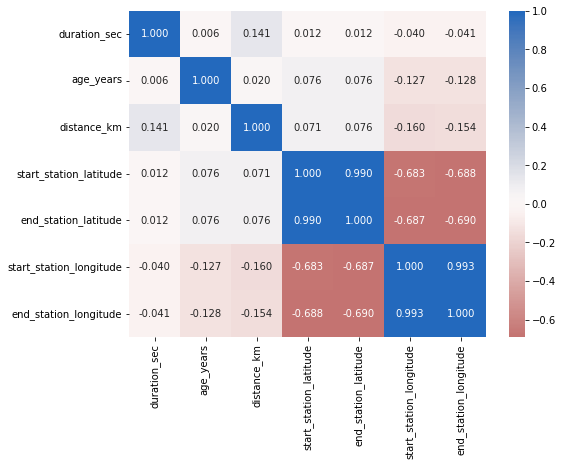

In [27]:
plt.figure(figsize = [8, 6])
sns.heatmap(bike[numerical_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

bike.shape= (175069, 22)
bike_samp.shape= (1000, 22)


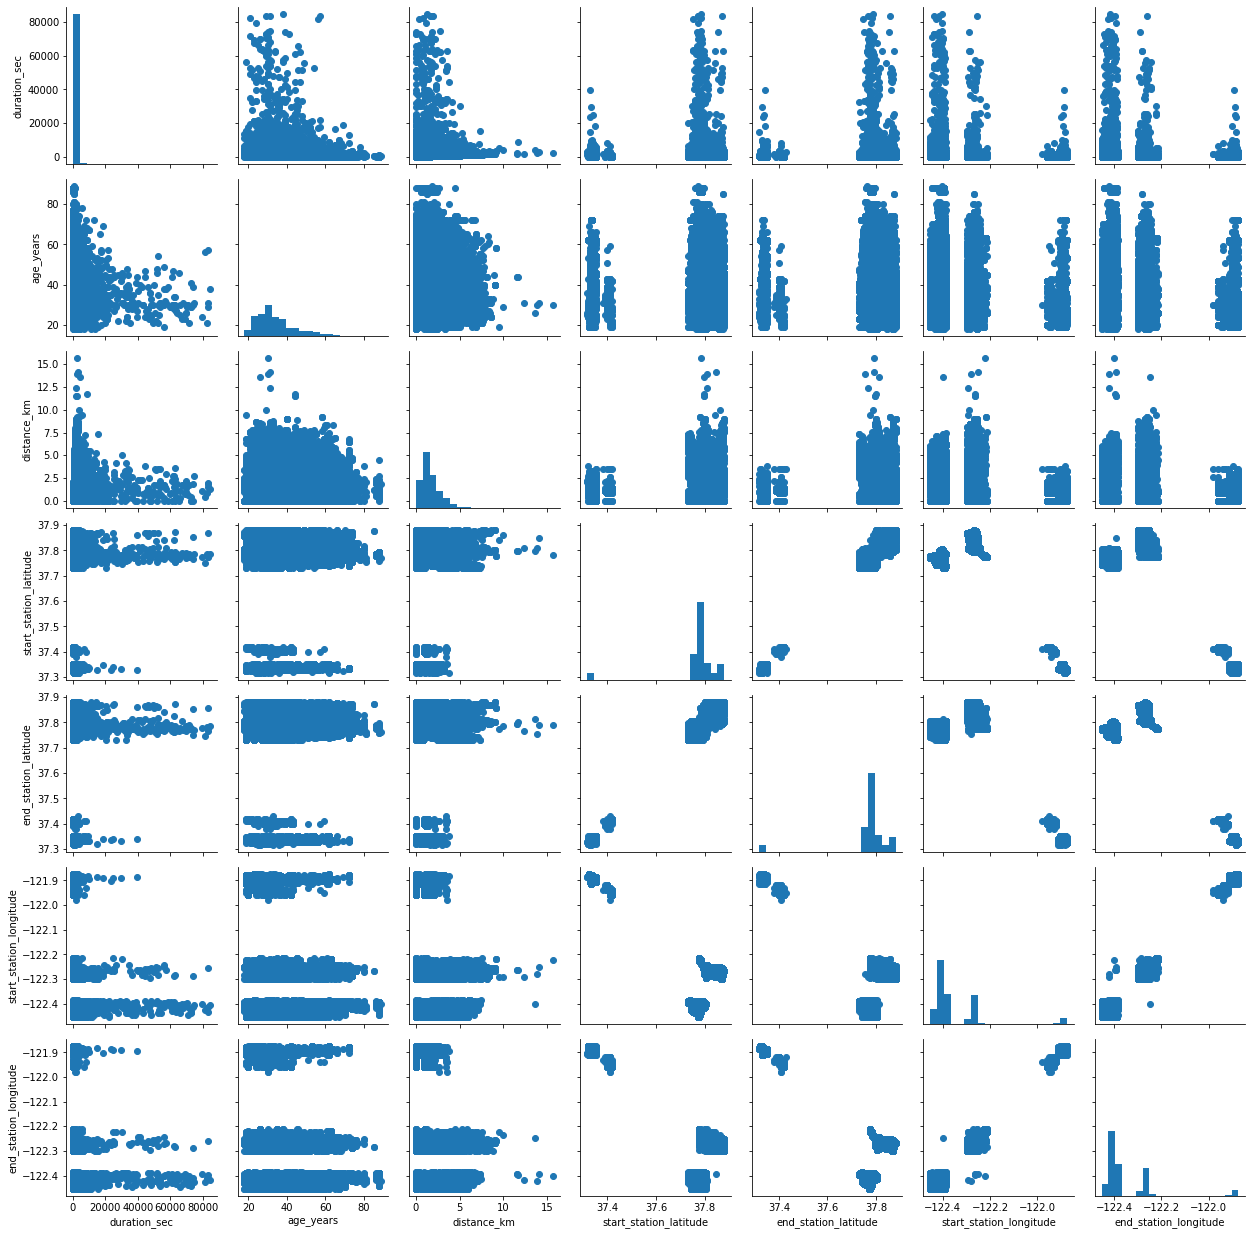

In [28]:
# plot matrix: sample 1000 bike trips so that plots are clearer and they render faster
print("bike.shape=",bike.shape)
bike_samp = bike.sample(n=1000, replace = False)
print("bike_samp.shape=",bike_samp.shape)

g = sns.PairGrid(data=bike, vars=numerical_vars)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist, bins=20);

There is no apparent or clear relationship between the duration, distance covered and ages of the bikers from the plots and correlation heatmap. These scatter plot shows a distinct geographical clustering between the latitudes and longitudes.

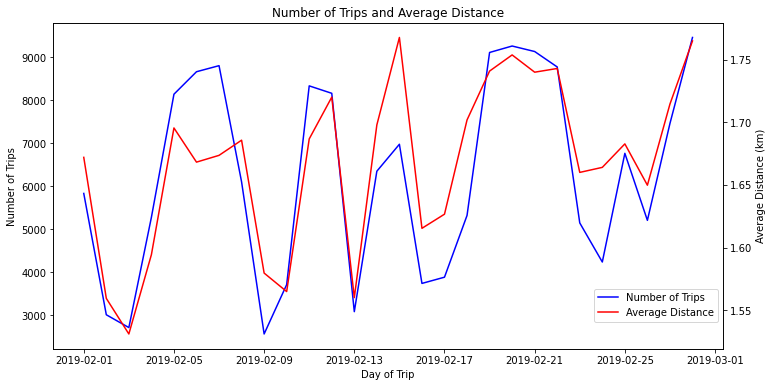

In [29]:
fig, ax1 = plt.subplots(figsize = [12,6])
bike.groupby('start_day')["distance_km"].count().plot(ax=ax1, color='blue', label='Number of Trips')
ax1.set_xlabel('Day of Trip')
ax1.set_ylabel('Number of Trips')
ax1.set_title('Number of Trips and Average Distance')
ax2 = ax1.twinx()
bike.groupby('start_day')["distance_km"].mean().plot(ax=ax2, color='red', label='Average Distance')
ax2.set_ylabel('Average Distance (km)')
fig.legend(loc="upper right", bbox_to_anchor=(1,0.2), bbox_transform=ax1.transAxes);

A time series plot of the number of trips per day and average distance covered per day shows a positive correlation between the trends. With an increase in number of trips per day, there is a general increase in the average distance per day.

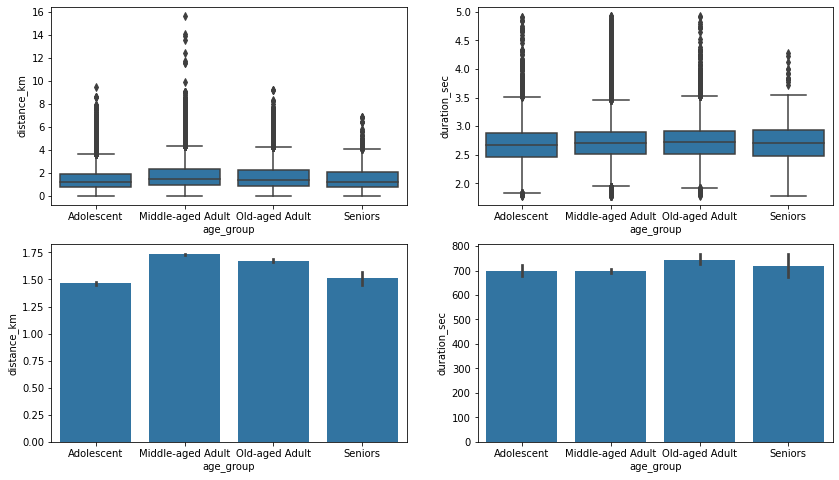

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [14,8])
sns.boxplot(data=bike, y='distance_km', x='age_group', ax=ax[0, 0], color=base_color)
sns.boxplot(data=bike, y=np.log10(bike.duration_sec), x='age_group', ax=ax[0, 1], color=base_color)
sns.barplot(data=bike, y='distance_km', x='age_group', ax=ax[1, 0], color=base_color)
sns.barplot(data=bike, y='duration_sec', x='age_group', ax=ax[1, 1], color=base_color);

The middle-aged adult covered an average of almost 1.75km as the highest followed closely by old-aged adults while old-aged adults rode for the longest time on average of just under 800 seconds followed by seniors on average of 700 seconds. These observations are generally true as middle-aged adults have strenght to travel farther and quicker with old-aged adults and seniors covering less distance at as slower speed resulting in a longer trip time.

*Note: The box plot of the duration was transformed using log function.*

Next, the relationship of days of the week with other numerical values will be considered.

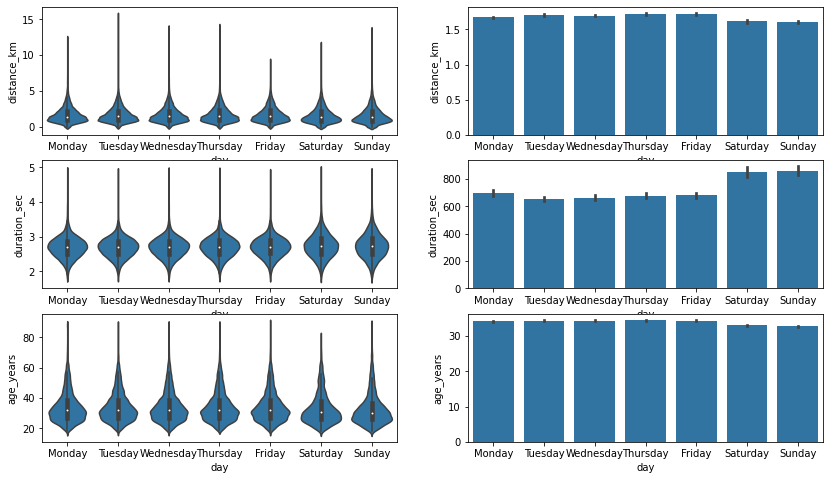

In [31]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize = [14,8])
sns.violinplot(data=bike, y='distance_km', x='day', ax=ax[0, 0], color=base_color, order=day_order)
sns.violinplot(data=bike, y=np.log10(bike.duration_sec), x='day', ax=ax[1, 0], color=base_color, order=day_order)
sns.barplot(data=bike, y='distance_km', x='day', ax=ax[0,1], color=base_color, order=day_order)
sns.barplot(data=bike, y='duration_sec', x='day', ax=ax[1,1], color=base_color, order=day_order)
sns.violinplot(data=bike, y='age_years', x='day', ax=ax[2,0], color=base_color, order=day_order)
sns.barplot(data=bike, y='age_years', x='day', ax=ax[2,1], color=base_color, order=day_order);

Exploring the distribution of the duration in seconds and the distance covered in kilometers across the days of the weeks shows that the medians of the categories are similar for both measures. There are variations however in the mean of these distributions. Tuesdays, Thursdays and Fridays have the most average distance covered by riders while the duartion of trips were higher on weekends. The average age and distribution of riders is similar across all days.

This poses a question: Do old-aged adults and seniors ride more on weekends? 

*Note: The violin plot of the duration was transformed using log function.*

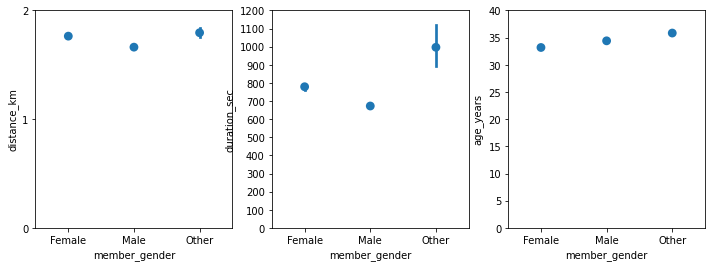

In [32]:
fig, ax = plt.subplots(ncols=3, figsize = [12,4])
sns.pointplot(data=bike, y='distance_km', x='member_gender', ax=ax[0], linestyles = '', dodge = 0.4)
sns.pointplot(data=bike, y='duration_sec', x='member_gender', ax=ax[1], linestyles = '', dodge = 0.4)
sns.pointplot(data=bike, y='age_years', x='member_gender', ax=ax[2], linestyles = '', dodge = 0.4)
ax[0].set_yticks(range(0, 3))
ax[1].set_yticks(range(0, 1300, 100))
ax[2].set_yticks(range(0, 45, 5));

Surprisingly, males cover the least average distance and travels for least duration. The "other" category is undefined and could have affected the result but we can't figure that out now.

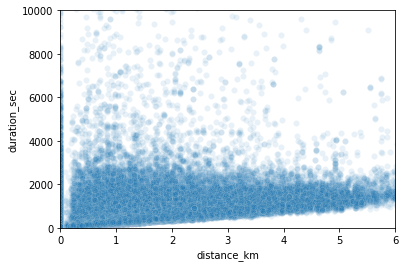

In [33]:
sns.scatterplot(data=bike, x='distance_km', y='duration_sec', alpha=0.1)
plt.xlim((0, 6))
plt.ylim((0, 10000));

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a slight correllation between the age group and the distance covered as Middle-aged adults in the range of 25-45 years was highest and their bike rides took less time meaning they moved at average speed higher than other age_groups. The average age and distribution of riders is similar across all days.

There seems to be a slight positive correlaton between the dstance covered and duration, but overall doesn't have any predictive ability.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Surprisingly, males cover the least average distance and travels for least duration. The "other" category is undefined and could have affected the result but we can't figure that out now. Likewise, the average distance covered during bike trips for weekdays were more than the average for weekend days.

There doesn't seem to be any strong correlation between the numerical variabes and categorical variables. 

<a id='multi'></a>
## Multivariate Exploration

> In this section, the categorical variables will be explored to know the relationship between ride measures.

<a href="#top">Back to Top</a>

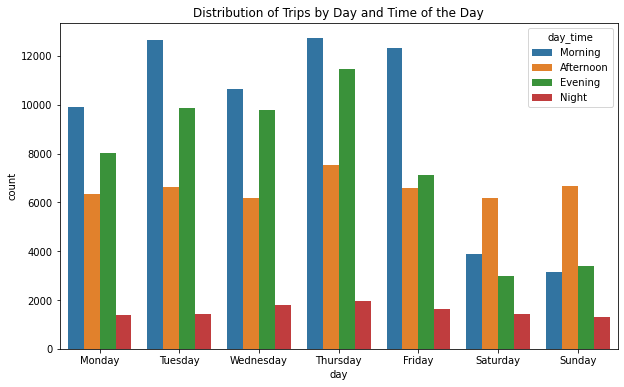

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))  
sns.countplot(data=bike, x='day', hue='day_time', order=day_order, hue_order=time_order)
plt.title('Distribution of Trips by Day and Time of the Day');

While plotting the distribution of the time of day previously, it was observed that most rides started during the mornings and evenings. A closer look by categorising with the days of the week shows that morning and evenings were actually the preferred time for trips but this was solely for the weekdays as most rides started in the afternoons on saturdays and sundays.

What might be the reason for this? Could the bike rides during weekdays be for commute to and from work via different stations?

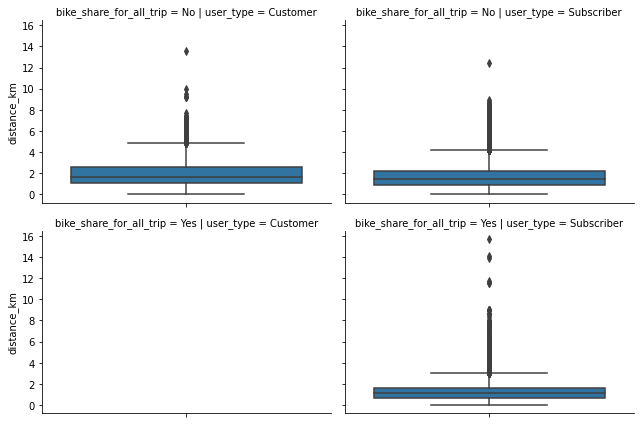

In [35]:
sns.catplot(data=bike, y="distance_km", kind='box', col='user_type', row='bike_share_for_all_trip', height=3, aspect=1.5);

From the visualization, day-time pass customers do not share bike rides as this is often a one-time ride from tourists, while subscribers who share bike rides cover a wide distance druing the trip.

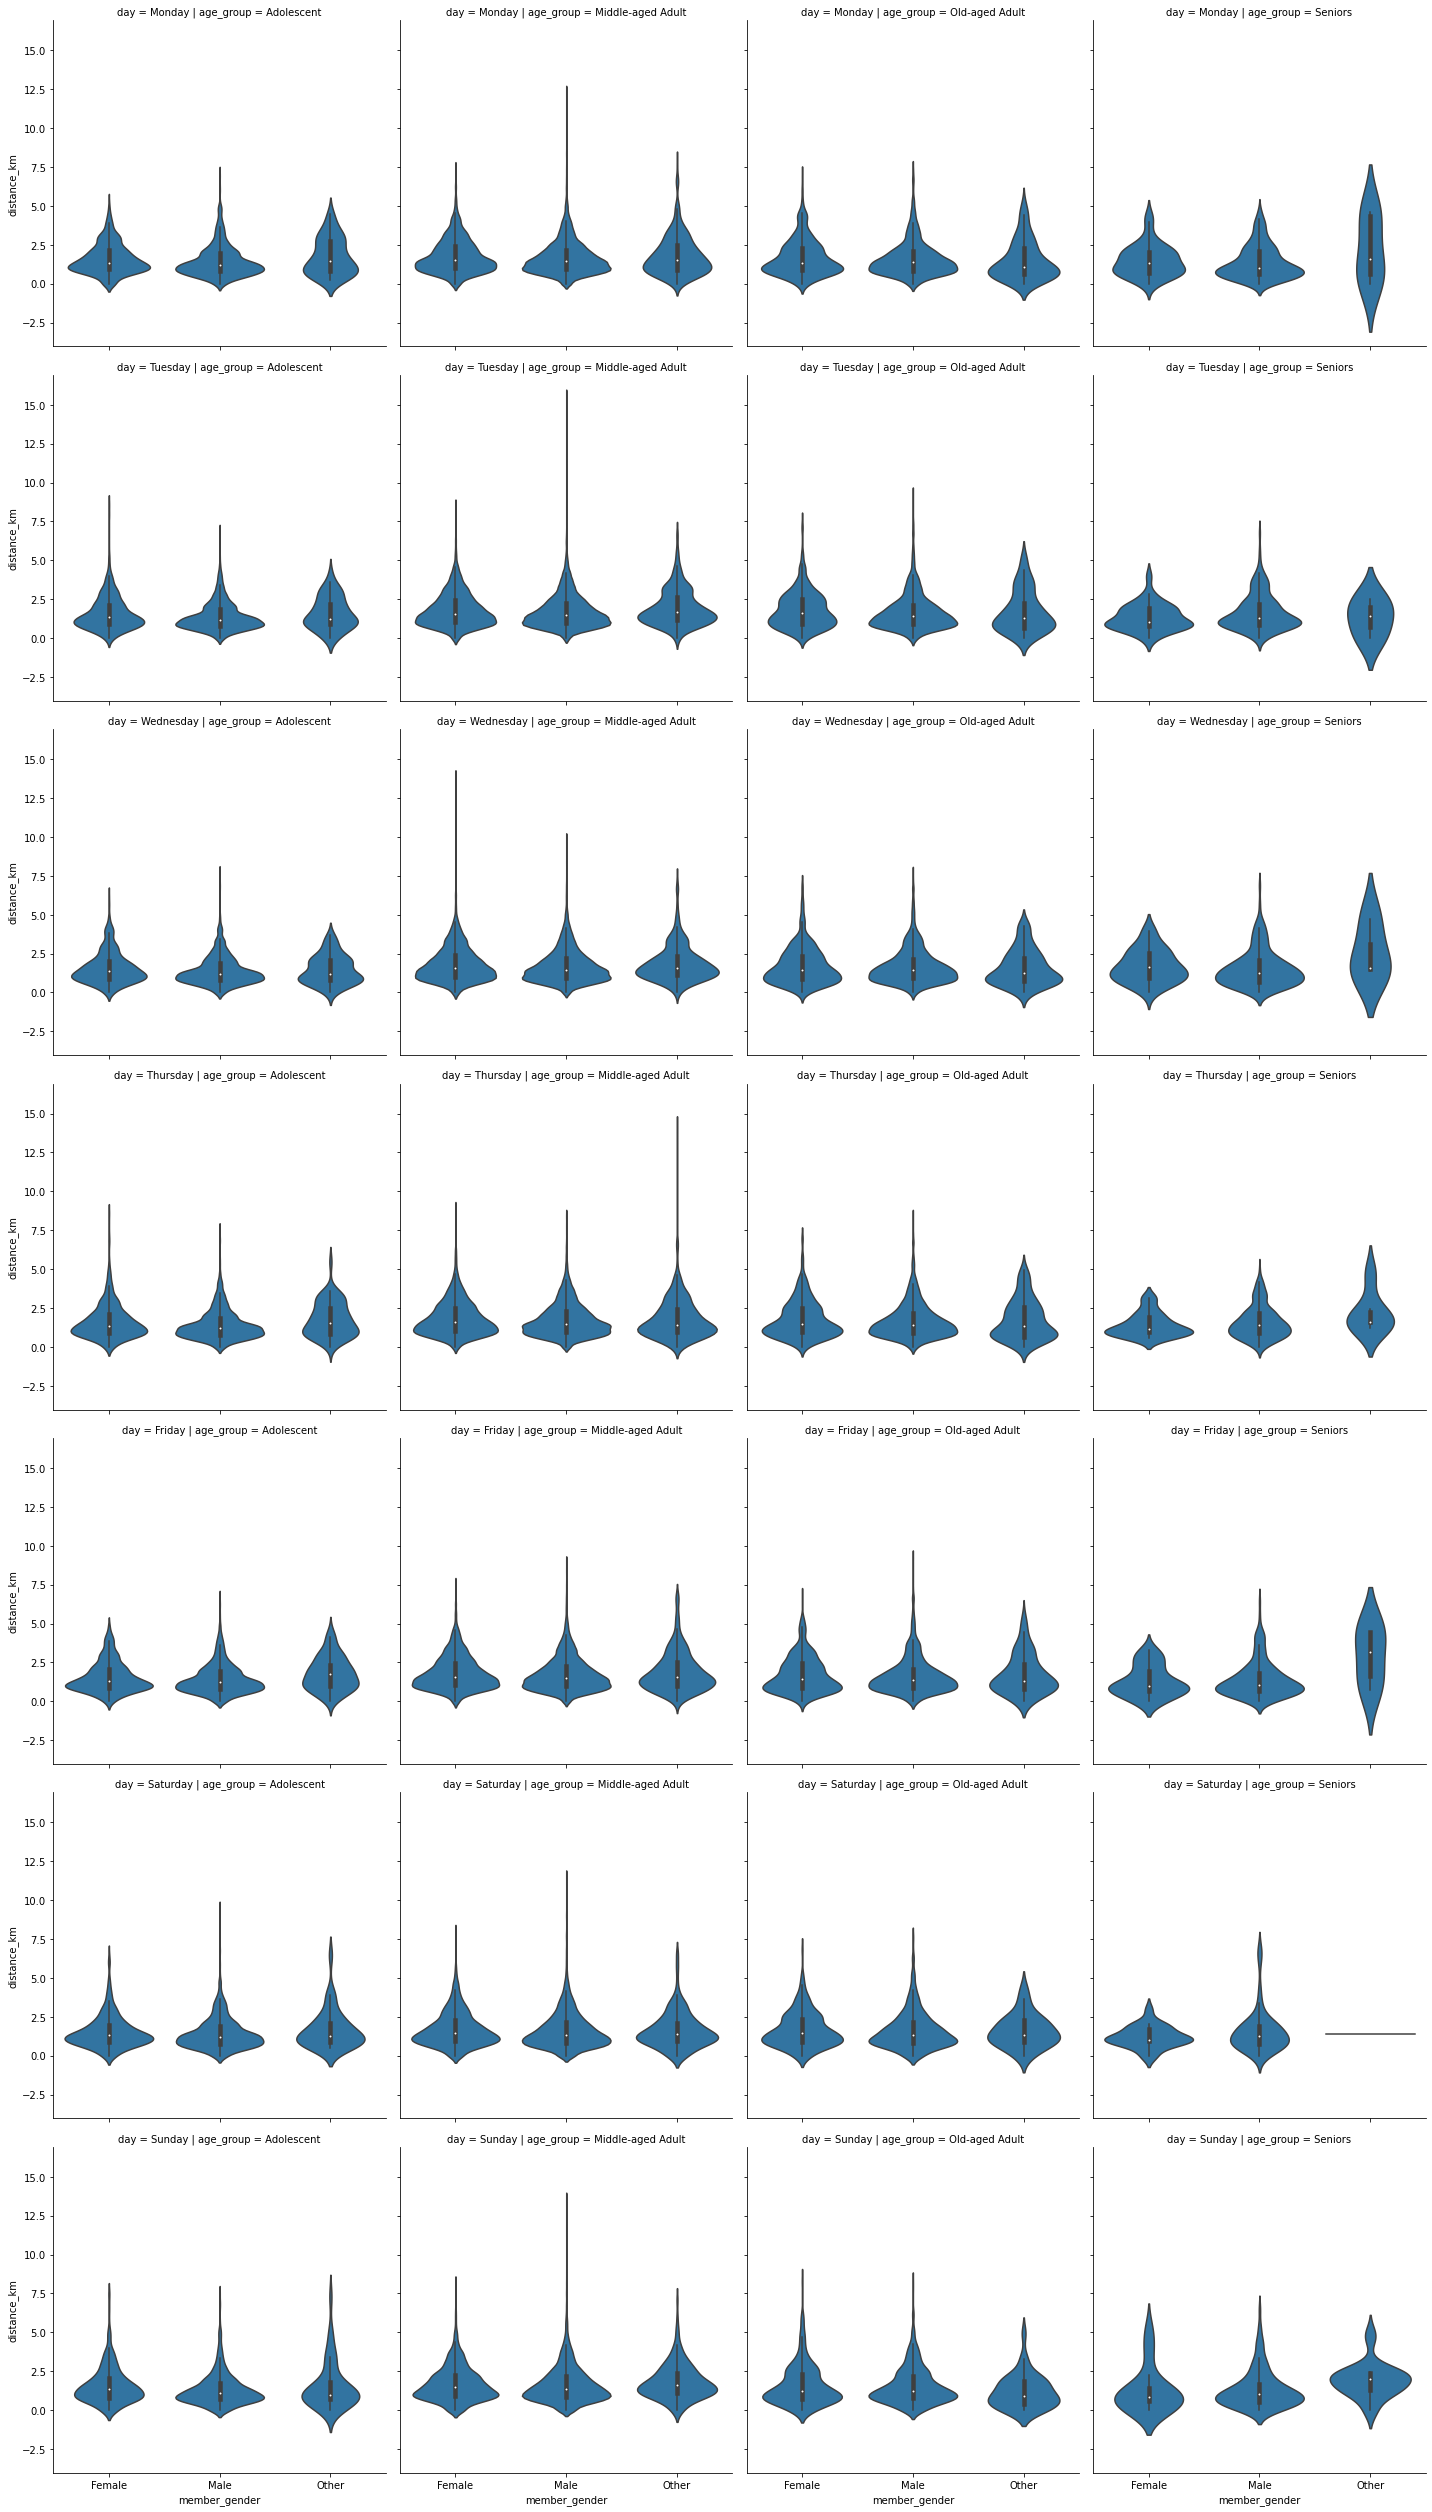

In [36]:
sns.catplot(data=bike, y='distance_km', 
            x='member_gender',
            col='age_group',
            row='day',
            row_order=day_order,
            color=base_color,
            kind="violin");

There are a lot of plots to check in this Facet but at a quick glance, it is clear that Middle-aged adults ride for a longer distance across all days than other age groups.

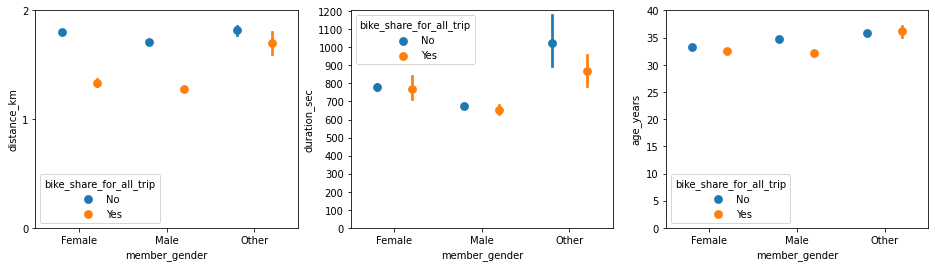

In [37]:
fig, ax = plt.subplots(ncols=3, figsize = [16,4])
sns.pointplot(data=bike, y='distance_km', x='member_gender', hue='bike_share_for_all_trip', ax=ax[0], linestyles = '', dodge = 0.4)
sns.pointplot(data=bike, y='duration_sec', x='member_gender', hue='bike_share_for_all_trip', ax=ax[1], linestyles = '', dodge = 0.4)
sns.pointplot(data=bike, y='age_years', x='member_gender', hue='bike_share_for_all_trip', ax=ax[2], linestyles = '', dodge = 0.4)
ax[0].set_yticks(range(0, 3))
ax[1].set_yticks(range(0, 1300, 100))
ax[2].set_yticks(range(0, 45, 5));

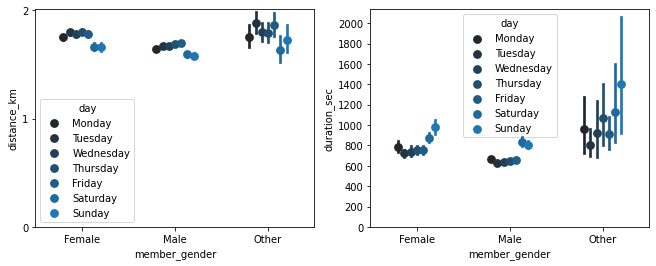

In [38]:
fig, ax = plt.subplots(ncols=2, figsize = [11,4])
sns.pointplot(data=bike, y='distance_km', x='member_gender', hue='day',hue_order=day_order, ax=ax[0],color=base_color,  linestyles = '', dodge = 0.4)
sns.pointplot(data=bike, y='duration_sec', x='member_gender', hue='day', hue_order=day_order, ax=ax[1], color=base_color, linestyles = '', dodge = 0.4)
ax[0].set_yticks(range(0, 3))
ax[1].set_yticks(range(0, 2200, 200));

The Female riders covered more distance and ride for longer periods across all days and are a little younger than male riders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Day-time pass customers do not share bike rides as this is often a one-time ride from tourists, while subscribers who share bike rides cover a wide distance druing the trip.
In adition, it is clear that Middle-aged adults ride for a longer distance across all days than other age groups.

### Were there any interesting or surprising interactions between features?

It was surprising that most rides started in the afternoons on saturdays and sundays on a closer examination when compared to the distribution where most rides started in the mornings and evenings.

Surprisingly, males cover the least average distance and travels for least duration. The "other" category is undefined and could have affected the result but we can't figure that out now.

<a id='conclusions'></a>
## Conclusions
Calculations and feature engineering was done to calculate some measures including age of users, distance of trip and categorical and descriptive information include the days of the week, time of days etc.

During data exploration, the following were findings noted:

* Most rides started in the mornings and took place during the weekdays, while most rides on weekends commenced in the afternoons.

* Middle-aged adult users accounted for over 70% of users and should be given attention to avoid customer churn.

<a href="#top">Back to Top</a>